# Trans Effect Pancan Pearson Correlations 

This notebook graphs pearson correlations between EGFR proteomics and PLAU for supplemental figure. It also calculates the average pearson correlation and p value across all of the cancer types.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

In [4]:
#cptac version
cptac.version()

'0.9.1'

In [5]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def pearson_stats(df1, x_axis, y_axis, print_stats = True):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        if print_stats:
            print("Correlation: " + str(corr))
            print("P_value:" + str(pval))
        
        else:
            return [corr,pval]
        
    else: 
        return "Not Enough Data"
   

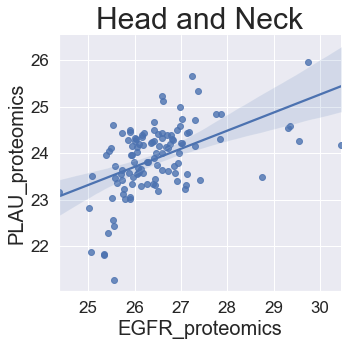

Correlation: 0.49978021567032394
P_value:1.2975262753374477e-08


In [6]:
hnscc_df = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
p.plot_pearson(hnscc_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "Head and Neck", ra_stats = False, show_plot = True,save_file_name= "png_files/Hnscc_PLAU")
pearson_stats(hnscc_df,"EGFR_proteomics","PLAU_proteomics")


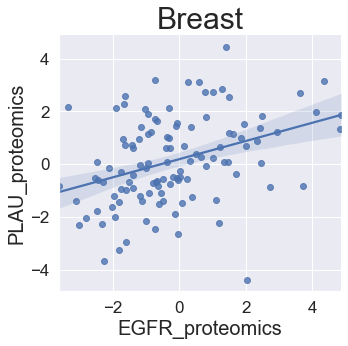

Correlation: 0.36933199863536154
P_value:4.866330264324229e-05


In [7]:
brca_df = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
brca_df.columns = brca_df.columns.droplevel(1)
p.plot_pearson(brca_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "Breast", ra_stats = False, show_plot = True,save_file_name= "png_files/Brca_PLAU")
pearson_stats(brca_df,"EGFR_proteomics","PLAU_proteomics")


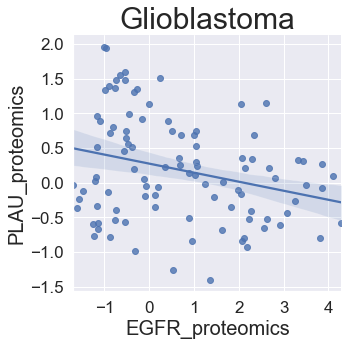

Correlation: -0.278912917799607
P_value:0.005180218244221548


In [8]:
gbm_df = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","PLAU"], tissue_type= "tumor")
p.plot_pearson(gbm_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "Glioblastoma", ra_stats = False, show_plot = True,save_file_name= "png_files/GBM_PLAU")
pearson_stats(gbm_df,"EGFR_proteomics","PLAU_proteomics")


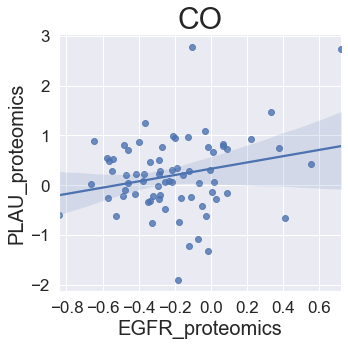

Correlation: 0.2339978352179278
P_value:0.04788960864125207


In [9]:
colon_df = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","PLAU"], tissue_type= "tumor")
p.plot_pearson(colon_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "CO", ra_stats = False, show_plot = True,save_file_name= "png_files/Colon_PLAU")
pearson_stats(colon_df,"EGFR_proteomics","PLAU_proteomics")


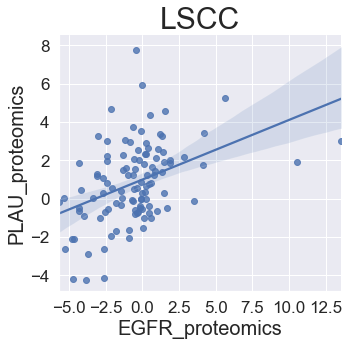

Correlation: 0.41213864832571173
P_value:9.34218524522056e-06


In [10]:
lscc_df = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
lscc_df.columns = lscc_df.columns.droplevel(1)
p.plot_pearson(lscc_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "LSCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Lscc_PLAU")
pearson_stats(lscc_df,"EGFR_proteomics","PLAU_proteomics")


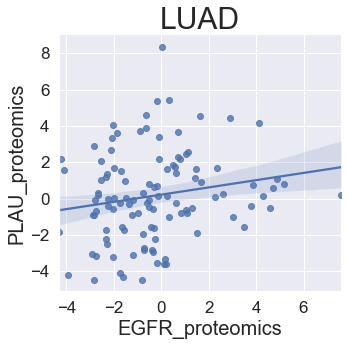

Correlation: 0.18115569303295917
P_value:0.058228363371412926


In [11]:
luad_df = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
luad_df.columns = luad_df.columns.droplevel(1)
p.plot_pearson(luad_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "LUAD", ra_stats = False, show_plot = True,save_file_name= "png_files/Luad_PLAU")
pearson_stats(luad_df,"EGFR_proteomics","PLAU_proteomics")


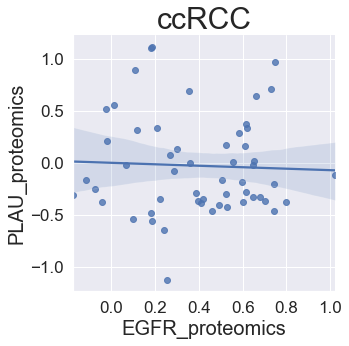

Correlation: -0.041226055334599235
P_value:0.7672410757139031


In [12]:
ccrcc_df = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
ccrcc_df.columns = ccrcc_df.columns.droplevel(1)
p.plot_pearson(ccrcc_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "ccRCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Renal_PLAU")
pearson_stats(ccrcc_df,"EGFR_proteomics","PLAU_proteomics")


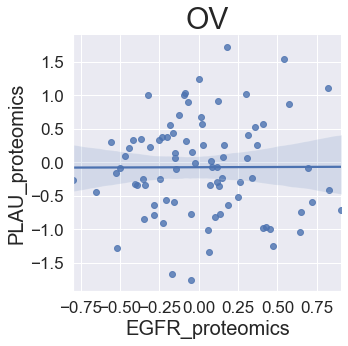

Correlation: 0.0034756705031338264
P_value:0.975122214747534


In [13]:
ovar_df = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
ovar_df.columns = ovar_df.columns.droplevel(1)
p.plot_pearson(ovar_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "OV", ra_stats = False, show_plot = True,save_file_name= "png_files/Ovarian_PLAU")
pearson_stats(ovar_df,"EGFR_proteomics","PLAU_proteomics")


# Average P value and Correlation 

The manuscript mentions that the average correlation for PLAU is 0.172. This is derivation of that number

In [14]:
alldf = [hnscc_df, luad_df, lscc_df, ccrcc_df, colon_df, brca_df, gbm_df, ovar_df]
all_pval = []
all_corr = []

for df in alldf:
   
    stats = pearson_stats(df,"EGFR_proteomics","PLAU_proteomics", print_stats=False)
    all_corr.append(stats[0])
    all_pval.append(stats[1])   

In [15]:
print("Avg correlation: " + str(stat.mean(all_corr)))
print("Avg p value: " + str(stat.mean(all_pval)))

Avg correlation: 0.17246763603140147
Avg p value: 0.23171493739768437
